In [ ]:
# nothing new here
# just some visualization of 2-armed bandits for my research

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

In [2]:
class Bandits():
    """2-armed bandit"""
    
    def __init__(self, probs):
        self.set_probs(probs)
    
    def set_probs(self, probs):
        self.probs = probs
        
    def step(self, action):
        thres = self.probs[action]
        return int(thres > np.random.rand())

In [3]:
from scipy.special import softmax

class Gradient_bandits():
    def __init__(self, lr, baseline=0.5, n_choices=2):
        
        self.lr = lr
        self.n_choices = n_choices
        
        self.preferences = np.zeros(n_choices)
        self.policy = np.ones(n_choices) / n_choices
        
        self.t = 0
        self.cum_rewards = 0
        self.mean_rewards = baseline
        
    def act(self,):
        return np.random.choice(np.arange(0, self.n_choices), p=self.policy)
        
    def learn(self, action, reward):
        
        # update preferences
        delta_preferences = self.lr * (reward - self.mean_rewards) * self.policy
        delta_preferences[action] = -(self.lr * (reward - self.mean_rewards) * (1 - self.policy[action]))
        self.preferences -= delta_preferences
        
        # update mean rewards
        self.t += 1
        self.cum_rewards += reward
        self.mean_rewards = self.cum_rewards / self.t
        
        # update policy
        self.policy = softmax(self.preferences)
        
        return delta_preferences[0]

In [4]:
N = 40

def how_to_name_this(env, agents, iterations=100):

    data = []
    for i in range(iterations):

        temp = []
        for j, agt in zip(range(N), agents):
            action = agt.act()
            reward = env.step(action)
            delta = agt.learn(action, reward)

            temp.append([i, j, action, reward, delta])

        data.append(np.array(temp))
        
    # cast into dataframe for seaborn
    return pd.DataFrame(np.vstack(data), columns=['Iteration','Agent','Action','Reward', 'Delta'])

env = Bandits([0.1, 0.9])
agents = [Gradient_bandits(1e-1) for _ in range(N)]
data = how_to_name_this(env, agents)

In [5]:
data

,Iteration,Agent,Action,Reward,Delta
0,0.0,0.0,1.0,1.0,0.025000
1,0.0,1.0,1.0,1.0,0.025000
2,0.0,2.0,1.0,1.0,0.025000
3,0.0,3.0,0.0,0.0,0.025000
4,0.0,4.0,1.0,1.0,0.025000
...,...,...,...,...,...
3995,99.0,35.0,0.0,0.0,0.066069
3996,99.0,36.0,1.0,1.0,0.002149
3997,99.0,37.0,1.0,1.0,0.001698
3998,99.0,38.0,1.0,0.0,-0.007225


In [6]:
data1 = how_to_name_this(Bandits([0.9, 0.1]), [Gradient_bandits(1e-1) for _ in range(N)])
data2 = how_to_name_this(Bandits([0.5, 0.5]), [Gradient_bandits(1e-1) for _ in range(N)])
data3 = how_to_name_this(Bandits([0.1, 0.9]), [Gradient_bandits(1e-1) for _ in range(N)])

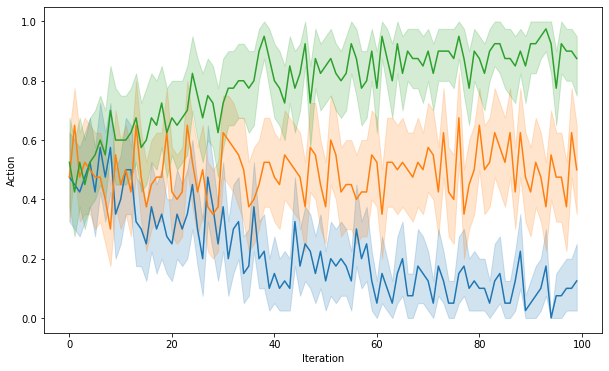

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=data1, x='Iteration', y='Action', ci=95, ax=ax);
sns.lineplot(data=data2, x='Iteration', y='Action', ci=95, ax=ax);
sns.lineplot(data=data3, x='Iteration', y='Action', ci=95, ax=ax);
plt.show()

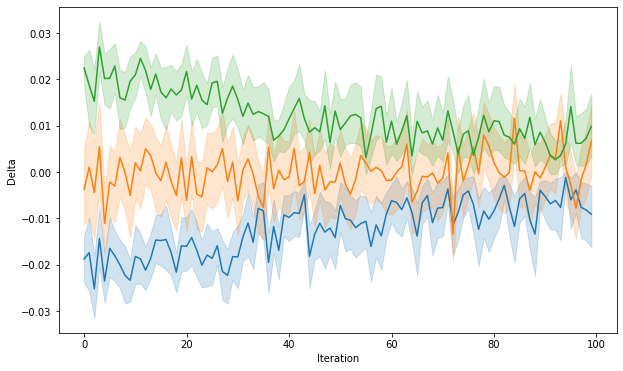

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=data1, x='Iteration', y='Delta', ci=95, ax=ax);
sns.lineplot(data=data2, x='Iteration', y='Delta', ci=95, ax=ax);
sns.lineplot(data=data3, x='Iteration', y='Delta', ci=95, ax=ax);
plt.show()